$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\cset}[1]{\mathcal{#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
\newcommand{\E}[2][]{\mathbb{E}_{#1}\left[#2\right]}
\newcommand{\ip}[3]{\left<#1,#2\right>_{#3}}
\newcommand{\given}[]{\,\middle\vert\,}
\newcommand{\DKL}[2]{\cset{D}_{\text{KL}}\left(#1\,\Vert\, #2\right)}
\newcommand{\grad}[]{\nabla}
$$

# Part 1: Mini-Project
<a id=part3></a>

### Presentors: 
    

|              Name |             Id |             email |
|-------------------|----------------|------------------ |
|  Shachar Zafran | 319002721 | shaharzafran@campus.technion.ac.il |
|  Dorin Shteyman | 206721102 | dorin.sh@campus.technion.ac.il |

In this part you'll implement a small comparative-analysis project, heavily based on the materials from the tutorials and homework.

### Guidelines

- You should implement the code which displays your results in this notebook, and add any additional code files for your implementation in the `project/` directory. You can import these files here, as we do for the homeworks.
- Running this notebook should not perform any training - load your results from some output files and display them here. The notebook must be runnable from start to end without errors.
- You must include a detailed write-up (in the notebook) of what you implemented and how. 
- Explain the structure of your code and how to run it to reproduce your results.
- Explicitly state any external code you used, including built-in pytorch models and code from the course tutorials/homework.
- Analyze your numerical results, explaining **why** you got these results (not just specifying the results).
- Where relevant, place all results in a table or display them using a graph.
- Before submitting, make sure all files which are required to run this notebook are included in the generated submission zip.
- Try to keep the submission file size under 10MB. Do not include model checkpoint files, dataset files, or any other non-essentials files. Instead include your results as images/text files/pickles/etc, and load them for display in this notebook. 

## Object detection on TACO dataset

TACO is a growing image dataset of waste in the wild. It contains images of litter taken under diverse environments: woods, roads and beaches.

<center><img src="imgs/taco.png" /></center>


you can read more about the dataset here: https://github.com/pedropro/TACO

and can explore the data distribution and how to load it from here: https://github.com/pedropro/TACO/blob/master/demo.ipynb


The stable version of the dataset that contain 1500 images and 4787 annotations exist in `datasets/TACO-master`
You do not need to download the dataset.


### Project goals:

* You need to perform Object Detection task, over 7 of the dataset.
* The annotation for object detection can be downloaded from here: https://github.com/wimlds-trojmiasto/detect-waste/tree/main/annotations.
* The data and annotation format is like the COCOAPI: https://github.com/cocodataset/cocoapi (you can find a notebook of how to perform evalutation using it here: https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoEvalDemo.ipynb)
(you need to install it..)
* if you need a beginner guild for OD in COCOAPI, you can read and watch this link: https://www.neuralception.com/cocodatasetapi/ 

### What do i need to do?

* **Everything is in the game!** as long as your model does not require more then 8 GB of memory and you follow the Guidelines above.


### What does it mean?
* you can use data augmentation, rather take what's implemented in the directory or use external libraries such as https://albumentations.ai/ (notice that when you create your own augmentations you need to change the annotation as well)
* you can use more data if you find it useful (for examples, reviwew https://github.com/AgaMiko/waste-datasets-review)


### What model can i use?
* Whatever you want!
you can review good models for the coco-OD task as a referance:
SOTA: https://paperswithcode.com/sota/object-detection-on-coco
Real-Time: https://paperswithcode.com/sota/real-time-object-detection-on-coco
Or you can use older models like YOLO-V3 or Faster-RCNN
* As long as you have a reason (complexity, speed, preformence), you are golden.

### Tips for a good grade:
* start as simple as possible. dealing with APIs are not the easiest for the first time and i predict that this would be your main issue. only when you have a running model that learn, you can add learning tricks.
* use the visualization of a notebook, as we did over the course, check that your input actually fitting the model, the output is the desired size and so on.
* It is recommanded to change the images to a fixed size, like shown in here :https://github.com/pedropro/TACO/blob/master/detector/inspect_data.ipynb
* Please adress the architecture and your loss function/s in this notebook. if you decided to add some loss component like the Focal loss for instance, try to show the results before and after using it.
* Plot your losses in this notebook, any evaluation metric can be shown as a function of time and possibe to analize per class.

Good luck!

## Implementation

**TODO**: This is where you should write your explanations and implement the code to display the results.
See guidelines about what to include in this section.

------------------------------------------------------------

## Mini-Project 

### Presentors: 
    

|              Name |             Id |             email |
|-------------------|----------------|------------------ |
|  Shachar Zafran | 319002721 | shaharzafran@campus.technion.ac.il |
|  Dorin Shteyman | 206721102 | dorin.sh@campus.technion.ac.il |

### Imports:

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import json

### Mini-Project Table of Contents:

##### 1. YOLOv7 overview

##### 2. YOLOv7 baseline model 

    2.1. Code structure & how to run it
    
##### 3. TACO dataset

    3.1. TACO class distrbution inspection
    
##### 4. Experiments

    4.1. First experiment - Optimizers
    
        4.1.1. Motivation & overview on the tested optimizers
        
        4.1.2. Code modifications for the experiment
        
        4.1.3. Results - numerical and visual
        
        4.1.4. Experiment conclusions - optimizers:
        
    4.2. Second experiment - IoU thresholds
        
        4.2.1. Motivation & overview on IoU
        
        4.2.2. Code modifications for the experiment
        
        4.2.3. Results - numerical and visual
        
        4.2.4. Experiment conclusions - IoU threshold
        
    
    4.3. Third experiment - Fine tuning (layers freezing)

        4.3.1. Motivation & overview on Fine tuning 
        
        4.3.2. Code modifications for the experiment
        
        4.3.3. Results - numerical and visual
        
        4.3.4. Experiment conclusions - Fine tuning (layers freezing)

##### 5. Summary

##### 6. References

----------------

### 1. YOLOv7 overview: 

After conducting some research, we've decided to use the latest YOLO model - YOLOv7 as our object detection model.

YOLOv7 is a SOTA (state-of-the-art) object detection model. It is the latest version of the You Only Look Once (YOLO) family of object detection models, which, unlike previous methods, use a single neural network to perform object detection and classification by dividing the input image into a grid of cells and predicting bounding boxes and object classes for each cell. This results in a faster and more efficient detection process.

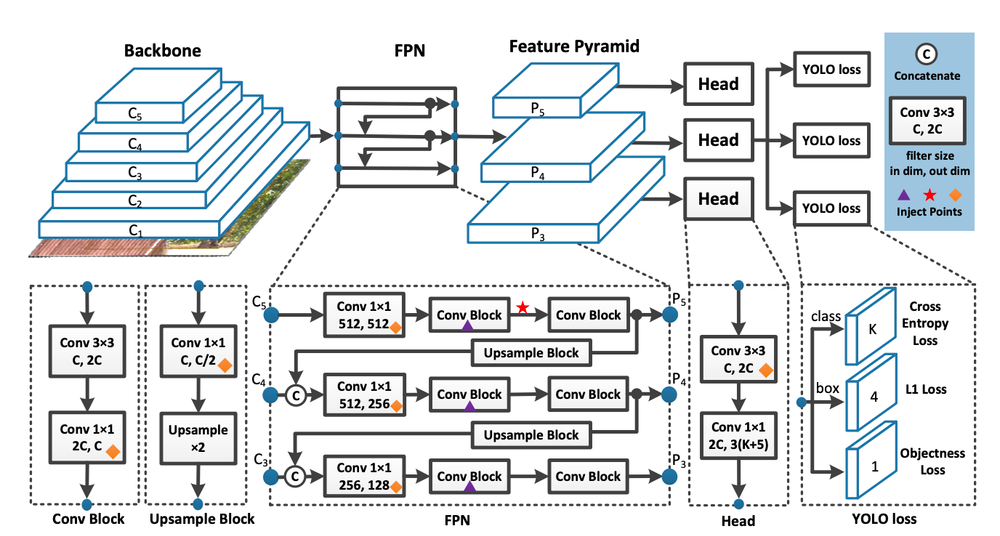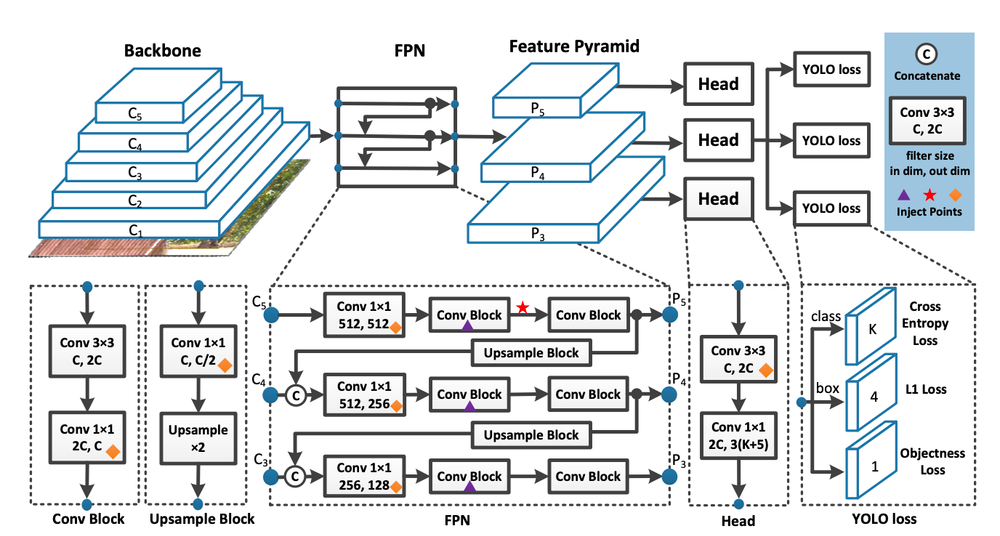

Compared to previous verisons, YOLOv7 has several significant improvements. YOLOv7 has a simplified architecture compared to YOLOv5 and YOLOv4, reducing the number of layers and parameters in the model, making training faster. YOLOv7 also has new techniques to improve accuracy, by a focus loss function that prioritizes difficult examples during training and additionally, YOLOv7 supports multi-scale training, which improves detection of objects of various sizes and ratios. 

Four notable improvements in YOLOv7 compared to older YOLO architectures are:

1. #### E-ELAN (Extended Efficient Layer Aggregation):

    Based on previous research, when considering the amount of memory it takes to keep layers in memory and the distance it takes a gradient to back-propagate through the layers, it was concluded that reducing the gradient distancemakes the network's learning more powerful. Thus, in YOLOv7 the chosen layer aggregation form is E-ELAN, an extend version of the ELAN computational block.

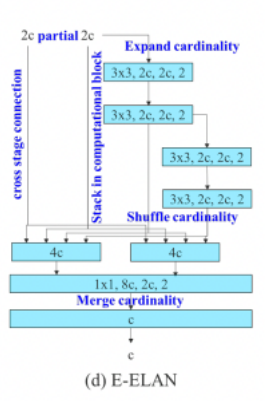

2. #### Re-parameterization:

    Re-parameterization techniques means averaging a set of model weights to make a model more robust to general patterns. Recently, a module level re-parameterization thecnique was presented, where pieces of the network use their own re-parameterization strategies. In YOLOv7, using gradient flow propagation paths, it is determined which modules of the network should use re-parameterization strategies and which shouldn't.

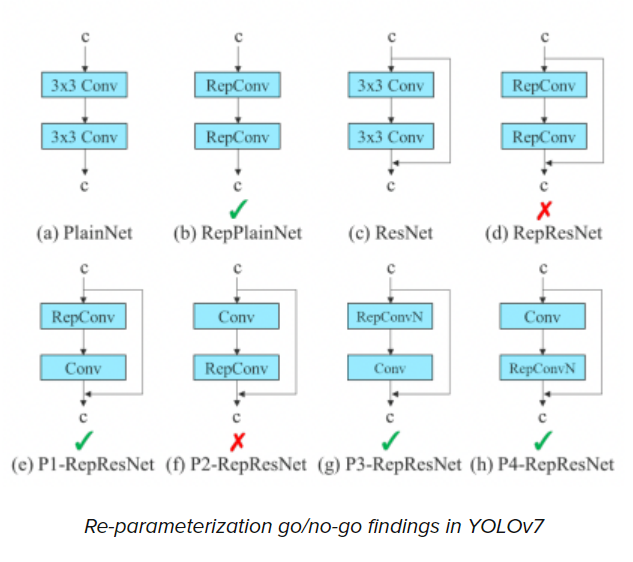

3. #### Auxiliary Head Coarse-to-Fine:

    The YOLO head outputs the final predictions, but it is far downstream. The added auxiliary head is in the middle and is also supervised during training as well as the regular head at the end. 

    The auxiliary head training process is less eficiently because the network is smaller between it an the prediction. YOLOv7 coarse-to-fine auxilary head supervision was decided. The coarse-to-fine supervision auxiliary head operates in two stages. In the first stage, the input image is divided into smaller grids, and object detection is done for each grid by itself. In the second stage, the outputs from each grid are aggregated to produce the final detection.

    It also includes a feedback mechanism - where the intermediate detection results are used to improve the detection performance of the next stages. This feedback mechanism helps to refine the detections, especially for smaller objects.

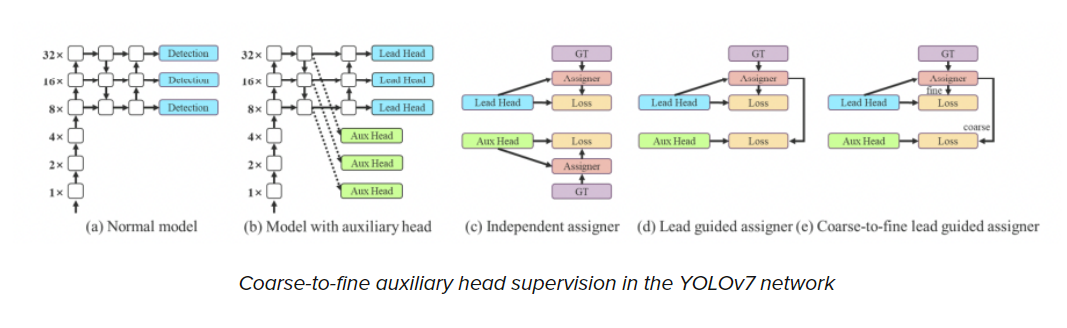

4. #### Focal loss:

    Previous versions of YOLO used a standard cross-entropy loss function, which is known to be less effective at detecting small objects. Focal loss overcomes this issue by down-weighting the loss for well-classified examples and focusing on the problematic examples and the objects that are hard to detect. The focal loss formula:

    FL(p_t) = -α_t(1 - p_t) ^γ * log(p_t)

    where:

    p_t is the predicted probability for the true class,
    α_t is the weighting factor for the true class (α_t = 1 for most cases),
    γ is the focusing parameter (typically γ > 0). When γ = 0, the focal loss becomes the cross-entropy loss.

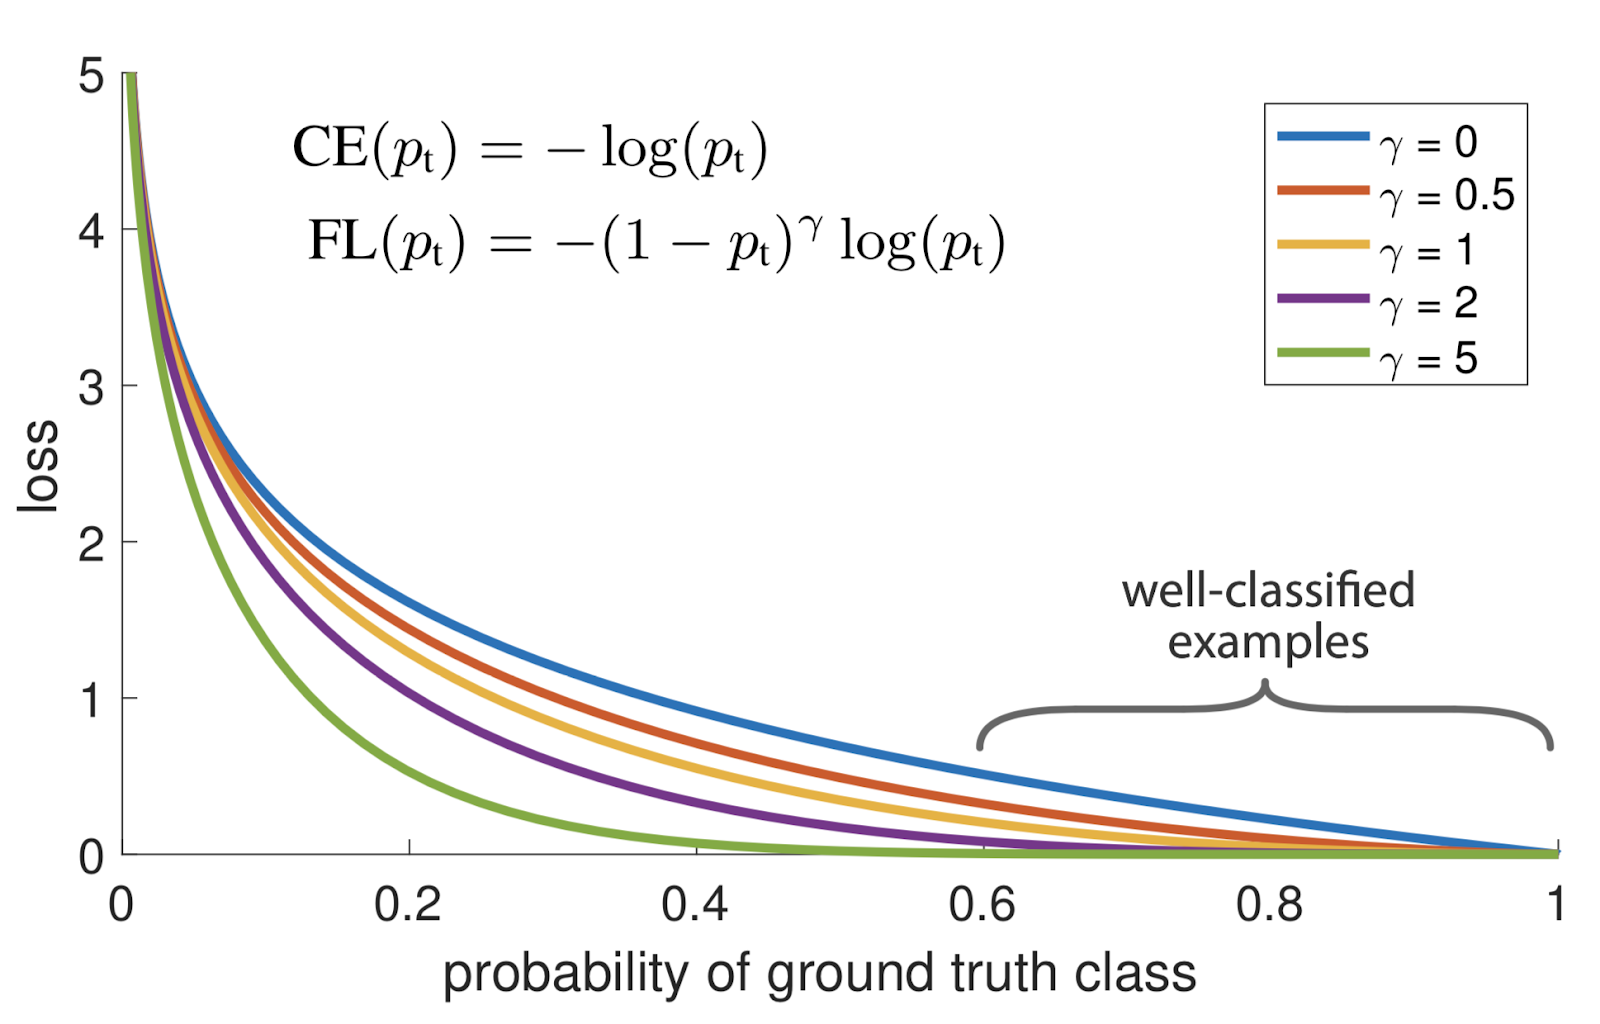

------------

### 2. YOLOv7 baseline model

#### 2.1. code structure & how to run it

Our baseline model was created by:

- cloning YOLOv7's github repostory [1] (where the number of classes is 7), pretrained on the varsetile and large COCO dataset.

- Installing "requirements.txt" file (as shown in /project/SetupEnv.ipynb)

- download the YOLOv7 starting weights from pretraining on the COCO datset: "yolov7_training.pt" (as shown in /project/SetupEnv.ipynb)

- Downloading the TACO dataset for trash detection of 7 classes [2], both train and validation (as shown in /project/MiniProject.ipynb)

- Run in the Lambda server the following line:

        sbatch -c 2 --gres=gpu:1 -o train.out -J train train.sh
  * ##### train.sh can be found in /project/train.sh


Baseline model configurations:

To train the baseline model, we set:

- Number of epochs = 30 (default is 300), Batch size = 8 (default is 16), fixed image size of [640, 640], pretrained COCO weights yolov7_training.pt, data (input images) is the TACO dataset for trash collection of 7 classes.

As for the rest of the necessary arguments, we use their predefined default arguments. 

__Note__: we changed the epochs to be 30 instead of 300 because we fine-tune over an already pretrained YOLOv7 over the COCO dataset, to make the model task-specific to trash detection.

__Note 2__: the batch size was changed from 16 to 8 due to computation and space limits of the Lambda server.

#### Some worth-mentioning settings of the baseline model are:

- SGD Optimizer, NO freezed layers, IoU training threshold of 0.2,  

- ##### Augmenation techniques applied on the baseline model:

    - Left/Right flip 
    - HSV = [saturation, hue, value] augmentation 
    - Image translation
    - Image mixup 
    

----------------

### 3. TACO dataset

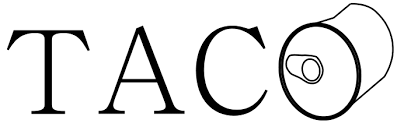

The TACO trash-detection dataset is a subset of the TACO dataset that focuses specifically on detecting trash objects in images. It contains over 6,000 images, each annotated with bounding boxes for 60 different types of trash objects, such as plastic bottles, cans, wrappers, and more.

For the sake of this project, we used the dataset when divided into 7 classes:
1. metals_and_plastic
2. other
3. non_recyclable
4. glass
5. paper
6. bio
7. unknown

This dataset is used for training and evaluating object detection models for trash detection in real-world scenes. The TACO trash-detection dataset provides a benchmark for evaluating the performance of trash detection models.

#### 3.1. TACO class distrbution inspection:

Let us first aspect the distribution of the image annotations in the __train set__ of the TACO dataset over its 7 class categories. Ideally, we'd want the annotations to be divided equally between each category, but in reality we see it's not the case as the following code demonstrates.

#### _As a result, we'd expect the models to be less capable of predicting rare classes_

In [ ]:
def count_string_occurrences(data, target_str):
    count = 0
    if isinstance(data, str):
            count += data.count(target_str)
            return count
    for key, value in data.items():
        if isinstance(value, dict):
            count += count_string_occurrences(json.dumps(value), target_str)
        elif isinstance(value, list):
            for item in value:
                count += count_string_occurrences(json.dumps(item), target_str)
    return count

categories_dict = {1:"metals_and_plastic", 2:"other", 3:"non_recyclable",
                   4:"glass", 5:"paper", 6:"bio", 7:"unknown"}
target_str_list = [f'"category_id": {x}' for x in list(categories_dict.keys())]

file_path = 'imgs/taco-dataset/annotations/annotations_train.json'
with open(file_path, 'r') as f:
    data = json.load(f)

count_arr = []    
for i, target_str in enumerate(target_str_list):
    # Call the 'count_string_occurrences' function
    count_arr.append(count_string_occurrences(data, target_str))
    # print(f'There are {count_arr[-1]} annotations of "{categories_dict[i+1]}" in the TACO training dataset')

# Define colors for each bar
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink']
    
# Create a bar plot
plt.bar(range(len(count_arr)), count_arr, tick_label=list(categories_dict.values()), color=colors)
plt.xticks(fontsize=10)
plt.xticks(rotation=315)

# Add bar values on top of bars
for i, val in enumerate(count_arr):
    plt.text(i, val+0.1, str(val), fontsize=10, ha='center')

plt.xlabel('Classes')
plt.ylabel('Annotations count')
plt.title('TACO dataset class distribution')

plt.show()

-------------

### 4. Experiments:

When running a training process, the YOLOv7 model plots some key results at the end of the training to help evaluating the model. All training experiments are saved in a folder called "runs" under the project's root folder. These plots are very informative, containing visual results of the test images next to the ground-truth boxes and labels  as well as numeric evaluation over some metrics and confusion matrix comparing the predicted and true classes. 

In the following section of the notebook, we evaluate model's performance according to the following evaluation methods: 

### Produced evaluations - explanation: 

#### Evaluation metrics:

The performance of the produced models of each experiment will be evaluated using the follwoing metrics:

* Recall - percentage of relevant objects that were correctly identified by the model out of all the relevant objects that should have been detected. High recall - the model is able to correctly identify most of the relevant objects. Low recall - the model is missing many of the relevant objects.

    Recall = True Positives / (True Positives + __False Negatives__)

* Percision - Precision is the ratio of true positive detections to the total number of positive detections (true positives plus false positives).

    Percision = True Positives / (True Positives + __False Positives__)

* mAP (mean Average Precision) - calculated by measuring the average precision for each class of objects in the dataset and taking the mean of those values. It takes into account both precision and recall, and it is calculated by computing the area under the precision-recall curve. Higher mAP score indicates better performance for the model.

    mAP@0.5 - mean average precision of the model's predictions when using an IoU threshold of 0.5 to determine if a prediction is a true positive or a false positive.

    mAP@0.5:0.95 - mean average precision of the model's predictions when using a range of intersection over union (IoU) thresholds from 0.5 to 0.95, in steps of 0.05, to determine if a prediction is a true positive or a false positive.

    __NOTE__ - the IoU threshold for training is not the same as the IoU threshold for evaluation! the IoU threshold set for training effects the loss component and thus the weights' update process and their final values.
    
#### Confusion matrix:   

* Definition - table that summarizes the performance of the model in classifying objects into different categories. The rows represent the predicted classes of objects and the columns represent the true classes of the objects. Each [i,j] cell of the confusion matrix represents chance of item of the true class __j__ to be predicted as an item of class __i__. 

* __class of no class__ - the "Background FN" class __column__ represents the scenario where the model falsely detected a bounding box as trash when there is no trash object inside the bounding box. the "Background FN" class __row__ represents the scenario where there is a trash object that the model didn't detect. For example, if a cell in the "Background FN" class _row_ is 1.0, it means that the class of this column is __never detected__ by the model.

#### Visual evaluation:

* In order to get an understanding of the models' behavior, it's also important to look at some visual results given the ground truth labels. For that, we plot for each model of each experiment a batch of test images showing both predicted and ground-truth object detections. These batches were produced by the YOLOv7 model and saved under the experiment's folder inside the "runs" folder.

### 4.1. First experiment - Optimizers

As we've learned in the course, optimizers are algorithms used to adjust the parameters of a neural network during training. They find the set of parameters that minimize the cost function. Diferent optimizers update the parameters differently based on the gradients of the cost function.

We've decided to test different optimizers for YOLOv7's training process. Here's a brief overview on each optimizer:

#### 4.1.1. Motivation & overview on the tested optimizers

- Adam (Adaptive Moment Estimation): adaptively adjusts the learning rate for each parameter based on past gradients.Adam is a combination of two gradient descent methods, Momentum, and RMSP. Adam is known for its fast convergence and robustness to noisy gradients.

- AdamW: a variation of Adam that incorporates weight decay into the update rule to prevent overfitting. Weight decay basically adds a penalty term to the loss function proportional to the L2 norm of the model's parameters.

- SGD (Stochastic Gradient Descent): basic optimization algorithm that updates the model parameters based on the negative gradient of the loss function with respect to each parameter. The gradient is estimated using a randomly sampled subset of the training data (mini-batch). SGD is simple and easy to implement, but it can suffer from slow convergence and sensitivity to the learning rate.

- Lion: new optimization algorithm that uses a two-phase search process. The first phase is a global search that explores the entire parameter space, and the second phase is a local search that fine-tunes the best solutions found in the first phase. Lion was meant to be robust to noisy gradients, it is relatively new and has not been widely adopted yet.

Reading about the new LION optimizer by Google encouraged us to test this aspect of the YOLOv7 model and to see how it responds particularly to this optimizer.

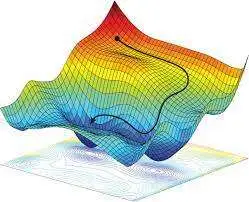

_illustration of an optimization process_

#### 4.1.2. Code modifications for the experiment

In order to activate diferent optimizers, in "train.py" we had to change the "optimizer" parameter assignment. SGD is the default optimizer used for the baseline model. For adam, YOLOv7 already has a configuration for this optimizer. We only added "--adam" to the command line inside "train.sh" (see /project/train.sh) like so:

##### python train.py --img 640 --epochs 22 --data ../taco-dataset/taco.yaml --cfg ./cfg/training/yolov7.yaml --weights yolov7_training.pt --batch-size 8 --adam

For Lion, we followed the instructions mentioned in its github repostory [3] and configured the optimizer parameter of the training process like so:

##### optimizer = Lion(pg0, lr=1e-4, weight_decay=1e-2)

where pg0 are some of the optimizer's parameter group.

For Adamw, we used the same default parameters defined in YOLOv7 for Adam (a common configuration for adamw) and assigned the optimizer parameter of the training process like so: 

##### optimizer = AdamW(pg0, lr=0.001, betas=0.937, weight_decay = 0.0005)

where pg0 are some of the optimizer's parameter group.

#### 4.1.3. Results

#### Evaluation metrics

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

results_txt_paths = ['results/training results/base-SGD/results.txt', 
                    'results/training results/adam/results.txt',
                    'results/training results/adamW/results.txt',
                    'results/training results/Lion/results.txt']

# fig, ax = plt.subplots(2, 2, figsize=(12, 6), tight_layout=True)
fig, ax = plt.subplots(4, 1, figsize=(15, 20), tight_layout=True)
ax = ax.ravel()
s = ['Precision', 'Recall','mAP@0.5', 'mAP@0.5:0.95']
labels = ['SGD (baseline)', 'Adam', 'AdamW', 'Lion']
for i in range(4):
    for fi, f in enumerate(results_txt_paths):
        results = np.loadtxt(f, usecols=[8, 9, 10, 11], ndmin=2).T
        n = results.shape[1]  # number of rows
        x = range(0, n)
        y = results[i, x]
        if i in [0, 1, 2, 5, 6, 7]:
            y[y == 0] = np.nan  # don't show zero loss values
        label = labels[fi] 
        ax[i].plot(x, y, marker='.', label=label, linewidth=2, markersize=8)
        ax[i].set_title(s[i], fontsize=18)
        ax[i].legend()

#### Confusion matrix

In [ ]:
listOfImageNames = ['results/training results/base-SGD/confusion_matrix.png', 
                    'results/training results/adam/confusion_matrix.png',
                    'results/training results/adamW/confusion_matrix.png',
                    'results/training results/Lion/confusion_matrix.png']
titles = ['SGD (baseline)', 'Adam', 'AdamW', 'Lion']

_, axs = plt.subplots(len(titles), 1, figsize=(40, 40))
axs = axs.ravel()
for img, ax, title in zip(listOfImageNames, axs, titles):
    img = cv2.imread(img)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(title, fontsize=18)
plt.show()

#### Visual results over a test batch

In [ ]:
listOfImageNames = ['results/training results/base-SGD/test_batch0_labels.jpg',
                    'results/training results/base-SGD/test_batch0_pred.jpg',
                    'results/training results/adam/test_batch0_labels.jpg',
                    'results/training results/adam/test_batch0_pred.jpg',
                    'results/training results/adamW/test_batch0_labels.jpg',
                    'results/training results/adamW/test_batch0_pred.jpg',
                    'results/training results/LION/test_batch0_labels.jpg',
                    'results/training results/LION/test_batch0_pred.jpg']
titles = ['SGD (baseline) ground-truth','SGD (baseline) prediction' ,
          'Adam ground-truth','Adam prediction',
          'AdamW ground-truth', 'AdamW prediction',
          'Lion ground-truth', 'Lion prediction']

_, axs = plt.subplots(len(titles), 1, figsize=(40,40), tight_layout=True)
axs = axs.ravel()
for img, ax, title in zip(listOfImageNames, axs, titles):
    img = cv2.imread(img)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(title, fontsize=16)
plt.show()

### 4.1.4. Experiment conclusions - optimizers:

#### Evaluation metrics - conclusions

* __SGD__ - Taking all 4 plots into account, the baseline SGD model achieves the best performance over the task. This result isn't surprising since the YOLOv7 model hyperparameters were configured under the use of the SGD optimizer. 
    
* __Adam__ - In constrast to SGD, the Adam optimizer performed the worst while we expected it to have similar rates as the SGD because it was also implemented in the YOLOv7 as an optimizer of choice (but not the default optimizer choice).

* __Lion__ - The lion model is the closest in perfomance to the SGD model (as seen clearly in the mAP plots) and even has a better recall value compared to SGD during most of the training epochs. Considering the fact that using the defualt lion setting of hyperparameters without twiking and no hyperparameter evolution of the YOLOv7 using lion, these results are quite promising and defienetly encourage further investigation.

* __AdamW__ - Since AdamW is an upgrade of the Adam optimizer, as expected, the adamW optimizer achieved close but slightly better results compared to Adam. 

#### Confusion matrix - conclusions

* As expected from the the TACO dataset inspection in _section 3.1._, all models aren't able to detect the classes with a small amount of data: "other", "glass", "bio". In addition, the __"unknown" class is probably very verstile and contains no learnable patterns__".

* Overall, the SGD model is the only model who's able to detect correctly the "paper" and "non-recyclabe" classes but also in low rates of 0.19 and 0.15 respectively. 
for the "metlas and platsic" class, SGD also performaes best and detects this class correctly in 40% of the cases. The Lion model achieves close results with 35% for the "metlas and platsic" class. AdamW and especially Adam perform poorly on all classes.

* Lion appears to need more data compared to SGD (because on the "metals and plastic" category it achieves similar results to SGD because this class has more data).

#### Visual results over a test batch - conclusions

As expected, the visual results coincide with the confusion matrix results, showing behaviors we observed such as:

- The "unknown" category cannot be detected by any model 

- Adam model barely produces detections since all classes cannot be predicted (classified as "backgroun FN")

- Metals and plastic is the predominant category for all other models, and SGD can also produce some exmaples as "non-recyclable"

In terms of detecting the bounding boxes, Lion and SGD show superior abilities (as expected).

### 4.2. Second experiment - IoU thresholds

As we've learned in the course and implemented in HW2, Interscetion of Union (IoU) is an important measure of accuracy for deep learning models who try to predict bounding boxes. 

In the follwoing experiment, we use the baseline model's parameters (described in previous section) an twik only the IoU threshold parameter to see how it effects the model's performance and accuracy. 

#### 4.2.1. Motivation & overview on Iou

The Intersection over Union (IoU) threshold is a parameter used in object detection tasks to measure the accuracy of the predicted bounding boxes around objects. It is calculated by taking the intersection area of the predicted and ground truth bounding boxes and dividing it by the union area of the two boxes. The IoU score is between 0 and 1, where an IoU score of 1 indicates a perfect match between the predicted and ground truth bounding boxes. The IoU threshold is a threshold value determines whether a predicted bounding box is considered a true positive detection or a false positive. Meaning, if the IoU score between the predicted and ground truth bounding boxes is above the IoU threshold, the prediction is considered a true positive and otherwise, it is a false positive.

If we set the IoU threshold too high we may miss some true positive detections because small deviations between predicted and ground truth bounding boxes can cause the IoU score to be below the IoU threshold. Setting the IoU threshold too low may result in accepting false positive detections. Therefore, finding an optimal IoU threshold is important to balance the trade-off bet ween maximizing accuracy (and maintaining the accuracy measure valid in a sense) and minimizing false positives. 

For this reason, we've decided to play around with the effect of the IoU and see first hand its effect on the YOLOv7 performance.

#### 4.2.2. Code modifications for the experiment

The only code modification that was necessary for this experiment was to set the IoU threshold variable (iou_t) inside the yaml file of the hyperparameters that the baseline model loads (hyp.scratch.p5.yaml) to the IoU threshold values we experimented with => 

iou_t values = [0.2 (baseline), 0.25, 0.35, 0.45, 0.55] 

#### 4.2.3. Results

#### Evaluation metrics

In [ ]:
results_txt_paths = ['results/training results/base-SGD/results.txt', 
                    'results/training results/iou_25/results.txt', 
                    'results/training results/iou_35/results.txt',
                    'results/training results/iou_45/results.txt',
                    'results/training results/iou_55/results.txt']

fig, ax = plt.subplots(4, 1, figsize=(15, 20), tight_layout=True)
ax = ax.ravel()
s = ['Precision', 'Recall','mAP@0.5', 'mAP@0.5:0.95']
labels = ['iou=0.2 (baseline)', 'iou=0.25', 'iou=0.35', 'iou=0.45', 'iou=0.55']
for i in range(4):
    for fi, f in enumerate(results_txt_paths):
        results = np.loadtxt(f, usecols=[8, 9, 10, 11], ndmin=2).T
        n = results.shape[1]  # number of rows
        x = range(0, n)
        y = results[i, x]
        if i in [0, 1, 2, 5, 6, 7]:
            y[y == 0] = np.nan  # don't show zero loss values
        label = labels[fi] 
        ax[i].plot(x, y, marker='.', label=label, linewidth=2, markersize=8)
        ax[i].set_title(s[i], fontsize=18)
        ax[i].legend()

#### Confusion matrix

In [ ]:
listOfImageNames = ['results/training results/base-SGD/confusion_matrix.png', 
                    'results/training results/iou_25/confusion_matrix.png', 
                    'results/training results/iou_35/confusion_matrix.png', 
                    'results/training results/iou_45/confusion_matrix.png', 
                    'results/training results/iou_55/confusion_matrix.png']
titles = ['iou=0.2 (baseline)', 'iou=0.25', 'iou=0.35', 'iou=0.45', 'iou=0.55']

_, axs = plt.subplots(len(titles), 1, figsize=(40, 40))
axs = axs.ravel()
for img, ax, title in zip(listOfImageNames, axs, titles):
    img = cv2.imread(img)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(title, fontsize=17)
plt.show()

#### Visual results over a test batch

In [ ]:
listOfImageNames = ['results/training results/base-SGD/test_batch0_labels.jpg',
                    'results/training results/base-SGD/test_batch0_pred.jpg',
                    'results/training results/iou_25/test_batch0_labels.jpg',
                    'results/training results/iou_25/test_batch0_pred.jpg',
                    'results/training results/iou_35/test_batch0_labels.jpg',
                    'results/training results/iou_35/test_batch0_pred.jpg',
                    'results/training results/iou_45/test_batch0_labels.jpg',
                    'results/training results/iou_45/test_batch0_pred.jpg',
                    'results/training results/iou_55/test_batch0_labels.jpg',
                    'results/training results/iou_55/test_batch0_pred.jpg']
titles = ['iou=0.2 ground-truth', 'iou=0.2 prediction',
          'iou=0.25 ground-truth','iou=0.25 prediction', 
          'iou=0.35 ground-truth', 'iou=0.35 prediction', 
          'iou=0.45 ground-truth', 'iou=0.45 prediction', 
          'iou=0.55 ground-truth', 'iou=0.55 prediction']

_, axs = plt.subplots(len(titles), 1, figsize=(40,40), tight_layout=True)
axs = axs.ravel()
for img, ax, title in zip(listOfImageNames, axs, titles):
    img = cv2.imread(img)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(title, fontsize=16)
plt.show()

### 4.2.4. Experiment conclusions - IoU thresholds:

#### Evaluation metrics - conclusions

Here, we see that surprisingly, the only model who substantially demonstrates worse performance is the iou=0.25. However, higher IoU values generate results similar to the baseline IoU value = 0.2.

Explanation - during the first 2 epochs all models behave the same, and from that point, probably, the gradient direction of the IoU=0.25 diverges to converge on a sub-optimal solution in relation to the other IoU models.

* This result comes to show the stochasticity of deep model optimization process
* i.e., __no linear realation__ between IoU growing values and model performance.

#### Confusion matrix - conclusions

* Correspondingly with the conclusions derived from the "Evaluation metrics - analysis" above, IoU=0.25 performs worse by a large margin on the "metals and plastic", "non-recyclabe" and "paper" classes. 

* As already described above, other classes suffer from lack of data and the "unknown" category (probably) doesn't carry learnable patterns, so we don't expect the models to classify them well.

* IoU=0.45 achieves the best accuracy and IoU=0.35 is only slighly less. Both IoU=0.45 and IoU=0.35 are better than the baseline IoU=0.2 model, especially on the paper class - but not by much.

* In general, the models (besides IoU=0.25) are very confident about their predictions, meaning that if they alreay detected the object, with high probability its detection is correct. This result is supported by the fact that the majority of "metals and plastic", "non-recyclabe" and "paper" classes predictions are "background FN", meaning the model didn't detect the object and the second highest value belong to the correct class.

#### Visual results over a test batch - conclusions

* For the reasons explained in the analysis above, all models beside IoU=0.25 produce similar detections.

* IoU=0.25 produces less bounding boxes, supported by its confusion matrix where most class predictions are "Background FN" - meaning the model wasn't able to detect them.

------------

### 4.3. Third experiment - Fine-tuning & layer freezing technique



#### 4.3.1. Motivation & overview on Fine-tuning

Fine-tuning is a transfer learning technique, where a pre-trained model is further trained on a new dataset or task. This is done by updating the pre-trained model's weights using a smaller dataset task-specific dataset (like the TACO datset for trash detection in our case) to learn specific features relevant to the new task. Fine-tuning can improve the performance of the model and reduce the training time required compared to training from scratch.

Layer freezing is a technique used during fine-tuning where certain layers in the pre-trained model are kept fixed and not updated during training. This is done to preserve the learned features in those layers and prevent overfitting on the new dataset. Typically, the lower layers are frozen, as they capture low-level features that are relevant across different tasks, while higher layers are fine-tuned to learn task-specific features.

#### 4.3.2. Code modifications for the experiment

After examining the yaml file of the YOOLOv7 architecture (yolov7.yaml), we decided to freeze the backbone layers (which are the first 51 layers) for the first experiment and the first 3 layers for the second experiment. Freezing more deep layers would result in underfitting to the task-specific (trash detection) problem. To do so, we changed the '--freeze' variable of the train argument parser inside the "__ main __" function of "train.py". 

- ##### For the backbone layers freezing: Line 573 in train.py was changed from:

    parser.add_argument('--freeze', nargs='+', type=int, default=[0])
    
    ##### to:
    
    parser.add_argument('--freeze', nargs='+', type=int, default=np.arange(51))
    
- ##### For the first 3 layers freezing: Line 573 in train.py was changed from:

    parser.add_argument('--freeze', nargs='+', type=int, default=[0])
    
    ##### to:
    
    parser.add_argument('--freeze', nargs='+', type=int, default=np.arange(3))
    



#### 4.3.3. Results

#### Evaluation metrics

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

results_txt_paths = ['results/training results/base-SGD/results.txt', 
                    'results/training results/freeze_3layers/results.txt',
                    'results/training results/freeze_backbone/results.txt']

fig, ax = plt.subplots(2, 2, figsize=(12, 6), tight_layout=True)
ax = ax.ravel()
s = ['Precision', 'Recall','mAP@0.5', 'mAP@0.5:0.95']
labels = ['no freeze (baseline)', 'freeze 3 first layers', 'freeze backbone']
for i in range(4):
    for fi, f in enumerate(results_txt_paths):
        results = np.loadtxt(f, usecols=[8, 9, 10, 11], ndmin=2).T
        n = results.shape[1]  # number of rows
        x = range(0, n)
        y = results[i, x]
        if i in [0, 1, 2, 5, 6, 7]:
            y[y == 0] = np.nan  # don't show zero loss values
        label = labels[fi] 
        ax[i].plot(x, y, marker='.', label=label, linewidth=2, markersize=8)
        ax[i].set_title(s[i])
        ax[i].legend()

#### Confusion matrix

In [ ]:
listOfImageNames = ['results/training results/base-SGD/confusion_matrix.png', 
                    'results/training results/freeze_3layers/confusion_matrix.png',
                    'results/training results/freeze_backbone/confusion_matrix.png']
titles = ['no freeze (baseline)', 'freeze 3 first layers', 'freeze backbone']

_, axs = plt.subplots(len(titles), 1, figsize=(40, 40))
axs = axs.ravel()
for img, ax, title in zip(listOfImageNames, axs, titles):
    img = cv2.imread(img)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(title, fontsize=18)
plt.show()

#### Visual results over a test batch 

In [ ]:
listOfImageNames = ['results/training results/base-SGD/test_batch0_labels.jpg',
                    'results/training results/base-SGD/test_batch0_pred.jpg',
                    'results/training results/freeze_3layers/test_batch0_labels.jpg',
                    'results/training results/freeze_3layers/test_batch0_pred.jpg',
                    'results/training results/freeze_backbone/test_batch0_labels.jpg',
                   'results/training results/freeze_backbone/test_batch0_pred.jpg']
titles = ['no freeze (baseline) ground-truth','no freeze (baseline) prediction' ,
          'freeze 3 first layers ground-truth','freeze 3 first layers prediction',
          'freeze backbone ground-truth', 'freeze backbone prediction']

_, axs = plt.subplots(len(titles), 1, figsize=(40,40), tight_layout=True)
axs = axs.ravel()
for img, ax, title in zip(listOfImageNames, axs, titles):
    img = cv2.imread(img)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(title, fontsize=16)
plt.show()

### 4.3.4. Experiment results - fine tuning (layers freezing)

#### Evaluation metrics - conclusions

* Overall, all models achieve relatively the same performance 

* We see that the model where we freeze the backbone, for some epochs during training, has high recall and low percision. It indicates that the model is identifying many objects as positively, but a large proportion of them are actually not true positives (meanig, don't belong to any trash class category). In other words, the model is identifying many objects that are not relevant.

* Since the backbone freeze model took ~1.5 hours less (9.3 hours instead of 10.8 hours), it shows that for larger datasets than TACO for trash detection, it can be recommended to freeze the backbone. 

#### Confusion matrix - conclusions

* The confusion matrix of the models coincides with the previous conclusion that the models achieve similar performance. 

* The model where we freeze the first 3 layers achieves the best results by a small margin over the no freeze baseline and the model where we freeze the backbone (who achieves slightly worse performance on each class comapred to the no freeze baseline model).

#### Visual results over a test batch - concluions

* Models show similar detection behavior, no further conclusions over what has already been said.

* For all models, we see mainly two predicted classes: metals and plastic and non-recyclable for the reasons mentioned before on data scarcity of other classes.

--------

### 5. Summary:

####  Overall results:

* Out of all the models of the experiments, the IoU=0.35, IoU=0.45 and freeze first 3 layers models achieved slightly better performance over the baseline YOLOv7 model.

* For large datsets, it can be recomended to freeze the backbone (first 50 layers) to make the training faster sice we saw no signifcant drop in the performance compared to the baseline YOLOv7 model.

* Despite having many instances, no model was able to learn the "unknown" class category, probably because of the versatility and lack of common features of objects who belong to this class. We believe that such unlearnable class can be detected by the model only if it can detect well _all other classes_ and confidently say that an object doesn't belong to any of them. This is obviously not the case for training models under the unbalanced and relatively small TACO trash collection dataset.


#### Limitations that (probably) had an effect on experiments' quality:

* The epoch amount and batch size were reduced due to the computation limitations of the Lambda server, which probably effected the training results over epochs and the ability to inspect the convergence of the models over many epochs, where maybe results become more stable and clear.

* When experimenting with several components defining the training of YOLOv7, we isolated these components in order to directly test their effect on the model's performance. Optimally, a better approach would be to perform grid-search over a combination of different hyper-parameters for each configuration and adjust their for optimal performance.

* The TACO dataset for trash collection is very unbalanced, restricting the ability of all the models to detect and classify correctly most of the classes.

* The Lion optimizer requires more data for learning compared to the SGD model who was able to learn to some extent classes with small amount of examples. It would be interesting to see Lion results over the extended verisons of the TACO trash collection dataset.


Overall, we noticed that even when applying our limited experiments, we were able to improve the baseline model performance, showing the importance of hyperparmeter tuning.

--------

### 6. References:

[1] YOLOv7 code (github) -  https://github.com/WongKinYiu/yolov7

[2] TACO dataset (github) - https://github.com/pedropro/TACO

[3] Lion optimizer (github) - https://github.com/lucidrains/lion-pytorch

[4] What is YOLOv7? A Complete Guide - https://blog.roboflow.com/yolov7-breakdown/

